# Flower Image Classifier AI application

Going forward, AI algorithms will be incorporated into more and more everyday applications. For example, you might want to include an image classifier in a smart phone app. To do this, I had used a deep learning model trained on hundreds of thousands of images as part of the overall application architecture. 

In [1]:
# Imports here
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import seaborn as sb

import json
import torch
from torch.autograd import variable

import seaborn as sb
import torch.nn.functional as F
from torch import nn
from torch import optim
from torchvision import datasets, transforms
import torchvision.models as models
import os as os
import time

from collections import OrderedDict
import glob
from PIL import Image

## Load the data

Here I have used `torchvision` to load the data.

In [2]:
data_dir = 'flowers'
train_dir = data_dir + '/train'
valid_dir = data_dir + '/valid'
test_dir = data_dir + '/test'

In [3]:
# Defineing data transform
train_transform = transforms.Compose([transforms.Resize(255),
                                      transforms.RandomRotation(30),
                                      transforms.RandomResizedCrop(224),
                                      transforms.RandomHorizontalFlip(),
                                      transforms.ToTensor(),
                                      transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                             std=[0.229, 0.224, 0.225])])
test_transform = transforms.Compose([transforms.Resize(255),
                                     transforms.CenterCrop(224),
                                     transforms.ToTensor(),
                                     transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                             std=[0.229, 0.224, 0.225])])

valid_transform = transforms.Compose([transforms.Resize(255),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor(),
                                      transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                             std=[0.229, 0.224, 0.225])])



#Loading the datasets with ImageFolder
trainset = datasets.ImageFolder(train_dir, transform = train_transform)
validset = datasets.ImageFolder(valid_dir, transform = valid_transform)
testset = datasets.ImageFolder(test_dir, transform = test_transform)

# Using the image datasets and the trainforms, define the dataloaders
trainloader = torch.utils.data.DataLoader(trainset, batch_size = 64, shuffle = True)
validloader = torch.utils.data.DataLoader(validset, batch_size = 32, shuffle = True)
testloader = torch.utils.data.DataLoader(testset, batch_size = 32, shuffle = True)

### Fetching Labels

In [4]:
with open('cat_to_name.json', 'r') as f:
    cat_to_name = json.load(f)

print(cat_to_name)

{'21': 'fire lily', '3': 'canterbury bells', '45': 'bolero deep blue', '1': 'pink primrose', '34': 'mexican aster', '27': 'prince of wales feathers', '7': 'moon orchid', '16': 'globe-flower', '25': 'grape hyacinth', '26': 'corn poppy', '79': 'toad lily', '39': 'siam tulip', '24': 'red ginger', '67': 'spring crocus', '35': 'alpine sea holly', '32': 'garden phlox', '10': 'globe thistle', '6': 'tiger lily', '93': 'ball moss', '33': 'love in the mist', '9': 'monkshood', '102': 'blackberry lily', '14': 'spear thistle', '19': 'balloon flower', '100': 'blanket flower', '13': 'king protea', '49': 'oxeye daisy', '15': 'yellow iris', '61': 'cautleya spicata', '31': 'carnation', '64': 'silverbush', '68': 'bearded iris', '63': 'black-eyed susan', '69': 'windflower', '62': 'japanese anemone', '20': 'giant white arum lily', '38': 'great masterwort', '4': 'sweet pea', '86': 'tree mallow', '101': 'trumpet creeper', '42': 'daffodil', '22': 'pincushion flower', '2': 'hard-leaved pocket orchid', '54': 's

# Building and training the classifier

In [5]:
model = models.densenet121(pretrained = True)
model

C:\Users\VAibhAv GupTA\Anaconda3\lib\site-packages\torchvision\models\densenet.py:212: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  nn.init.kaiming_normal(m.weight.data)
C:\Users\VAibhAv GupTA\Anaconda3\lib\site-packages\torchvision\models\densenet.py:212: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  nn.init.kaiming_normal(m.weight.data)
C:\Users\VAibhAv GupTA\Anaconda3\lib\site-packages\torchvision\models\densenet.py:212: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  nn.init.kaiming_normal(m.weight.data)
C:\Users\VAibhAv GupTA\Anaconda3\lib\site-packages\torchvision\models\densenet.py:212: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  nn.init.kaiming_normal(m.weight.data)
C:\Users\VAibhAv GupTA\Anaconda3\lib\site-packages\torchvision\models\densenet.py:212: UserWarning: nn.init.kaiming_normal is no

C:\Users\VAibhAv GupTA\Anaconda3\lib\site-packages\torchvision\models\densenet.py:212: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  nn.init.kaiming_normal(m.weight.data)
C:\Users\VAibhAv GupTA\Anaconda3\lib\site-packages\torchvision\models\densenet.py:212: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  nn.init.kaiming_normal(m.weight.data)
C:\Users\VAibhAv GupTA\Anaconda3\lib\site-packages\torchvision\models\densenet.py:212: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  nn.init.kaiming_normal(m.weight.data)
C:\Users\VAibhAv GupTA\Anaconda3\lib\site-packages\torchvision\models\densenet.py:212: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  nn.init.kaiming_normal(m.weight.data)
C:\Users\VAibhAv GupTA\Anaconda3\lib\site-packages\torchvision\models\densenet.py:212: UserWarning: nn.init.kaiming_normal is no

C:\Users\VAibhAv GupTA\Anaconda3\lib\site-packages\torchvision\models\densenet.py:212: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  nn.init.kaiming_normal(m.weight.data)
C:\Users\VAibhAv GupTA\Anaconda3\lib\site-packages\torchvision\models\densenet.py:212: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  nn.init.kaiming_normal(m.weight.data)
C:\Users\VAibhAv GupTA\Anaconda3\lib\site-packages\torchvision\models\densenet.py:212: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  nn.init.kaiming_normal(m.weight.data)
C:\Users\VAibhAv GupTA\Anaconda3\lib\site-packages\torchvision\models\densenet.py:212: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  nn.init.kaiming_normal(m.weight.data)
C:\Users\VAibhAv GupTA\Anaconda3\lib\site-packages\torchvision\models\densenet.py:212: UserWarning: nn.init.kaiming_normal is no

C:\Users\VAibhAv GupTA\Anaconda3\lib\site-packages\torchvision\models\densenet.py:212: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  nn.init.kaiming_normal(m.weight.data)
C:\Users\VAibhAv GupTA\Anaconda3\lib\site-packages\torchvision\models\densenet.py:212: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  nn.init.kaiming_normal(m.weight.data)
C:\Users\VAibhAv GupTA\Anaconda3\lib\site-packages\torchvision\models\densenet.py:212: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  nn.init.kaiming_normal(m.weight.data)
C:\Users\VAibhAv GupTA\Anaconda3\lib\site-packages\torchvision\models\densenet.py:212: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  nn.init.kaiming_normal(m.weight.data)
C:\Users\VAibhAv GupTA\Anaconda3\lib\site-packages\torchvision\models\densenet.py:212: UserWarning: nn.init.kaiming_normal is no

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplac

In [6]:
for param in model.parameters():
    param.requires_grad = False
    
classifier = nn.Sequential(OrderedDict([
                         ('fc1', nn.Linear(1024, 512)),
                         ('relu1', nn.ReLU()),
                         ('fc2', nn.Linear(512, 102)) ,
                         ('output', nn.LogSoftmax(dim = 1))]))

model.classifier = classifier
print(classifier)

Sequential(
  (fc1): Linear(in_features=1024, out_features=512, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=512, out_features=102, bias=True)
  (output): LogSoftmax()
)


In [7]:
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.classifier.parameters(), lr=0.001)

In [8]:
# Implement a function for the validation pass
def validation(model, validloader, criterion):
    test_loss = 0
    accuracy = 0
    for images, labels in validloader:

        images, labels = images.to('cuda'), labels.to('cuda')
        output = model.forward(images)
        test_loss += criterion(output, labels).item()

        ps = torch.exp(output)
        equality = (labels.data == ps.max(dim=1)[1])
        accuracy += equality.type(torch.FloatTensor).mean()
    
    return test_loss, accuracy

In [9]:
def do_deep_learning(model, trainloader, epochs, print_every, criterion, optimizer, device='cpu'):
    epochs = epochs
    print_every = print_every
    steps = 0

    # change to cuda
    model.cuda()

    for e in range(epochs):
        running_loss = 0
        for ii, (inputs, labels) in enumerate(trainloader):
            steps += 1

            inputs, labels = inputs.to('cuda'), labels.to('cuda')

            optimizer.zero_grad()

            # Forward and backward passes
            outputs = model.forward(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

            if steps % print_every == 0:
                model.eval()
                with torch.no_grad():
                    test_loss, accuracy = validation(model, validloader, criterion)
            
                print("Epoch: {}/{}.. ".format(e+1, epochs),
                  "Training Loss: {:.3f}.. ".format(running_loss/print_every),
                  "Test Loss: {:.3f}.. ".format(test_loss/len(validloader)),
                  "Test Accuracy: {:.3f}".format(accuracy/len(validloader)))
            
                running_loss = 0
    
    
do_deep_learning(model, trainloader, 20, 42, criterion, optimizer, 'gpu')

Epoch: 1/20..  Training Loss: 4.016..  Test Loss: 3.126..  Test Accuracy: 0.295
Epoch: 1/20..  Training Loss: 2.549..  Test Loss: 1.801..  Test Accuracy: 0.585
Epoch: 2/20..  Training Loss: 0.811..  Test Loss: 1.158..  Test Accuracy: 0.744
Epoch: 2/20..  Training Loss: 1.206..  Test Loss: 0.831..  Test Accuracy: 0.815
Epoch: 3/20..  Training Loss: 0.085..  Test Loss: 0.758..  Test Accuracy: 0.813
Epoch: 3/20..  Training Loss: 0.803..  Test Loss: 0.598..  Test Accuracy: 0.868
Epoch: 3/20..  Training Loss: 0.779..  Test Loss: 0.576..  Test Accuracy: 0.852
Epoch: 4/20..  Training Loss: 0.413..  Test Loss: 0.503..  Test Accuracy: 0.881
Epoch: 4/20..  Training Loss: 0.608..  Test Loss: 0.449..  Test Accuracy: 0.886
Epoch: 5/20..  Training Loss: 0.117..  Test Loss: 0.388..  Test Accuracy: 0.896
Epoch: 5/20..  Training Loss: 0.580..  Test Loss: 0.404..  Test Accuracy: 0.899
Epoch: 5/20..  Training Loss: 0.551..  Test Loss: 0.375..  Test Accuracy: 0.903
Epoch: 6/20..  Training Loss: 0.406..  T

## Testing network

In [10]:
# TODO: Do validation on the test set
def check_accuracy_on_test(testloader):    
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            images, labels = images.to('cuda'), labels.to('cuda')
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the test images: %.3f %%' % (100 * correct / total))

check_accuracy_on_test(testloader)

Accuracy of the network on the test images: 93.040 %


In [11]:
#Saveing the checkpoint 
checkpoint = {'state_dict': model.state_dict(),
                  'optimizer' : optimizer.state_dict,
                  'classIndex' : trainset.class_to_idx,
                  'model' : model}

torch.save(checkpoint, 'checkpoint.pth')

In [12]:
#loading a checkpoint and rebuilds the model
def load_checkpoint(filepath):
    checkpoint = torch.load(predict_args.checkpoint)
    model = checkpoint['model']
    classifier = nn.Sequential(OrderedDict([
                                 ('fc1', nn.Linear(1024, 512)),
                                 ('relu1', nn.ReLU()),
                                 ('fc2', nn.Linear(512, 102)) ,
                                 ('output', nn.LogSoftmax(dim = 1))]))
    model.classifier = classifier
    model.load_state_dict(checkpoint['state_dict'])
    model.class_to_idx = checkpoint['classIndex']

    return model


## Image Preprocessing

In [17]:
def process_image(image):
    ''' Scales, crops, and normalizes a PIL image for a PyTorch model,
        returns an Numpy array
    '''
    img = Image.open(image)

    width, height = img.size
    if width < height:
        img.thumbnail((256,height))
    else:
        img.thumbnail((width,256))
    imgwidth = img.size[0]
    imgheight = img.size[1]
    halfimgwidth = imgwidth//2
    halfimgheight = imgheight//2

    crop_square = (imgwidth//2 - 112, 
                   imgheight//2 - 112, 
                   imgwidth//2 + 112, 
                   imgheight//2 + 112)

    img = img.crop(crop_square)
    to_tensor = transforms.ToTensor()
    img = to_tensor(img)
    normalize = transforms.Normalize([0.485, 0.456, 0.406], 
                         [0.229, 0.224, 0.225])
    img = normalize(img)
    img = np.array(img)
    img = np.ndarray.transpose(img)
    return img
image_path = ('flowers/test/90/image_04405.jpg')

(529, 500)
(270, 256)


(224, 224, 3)

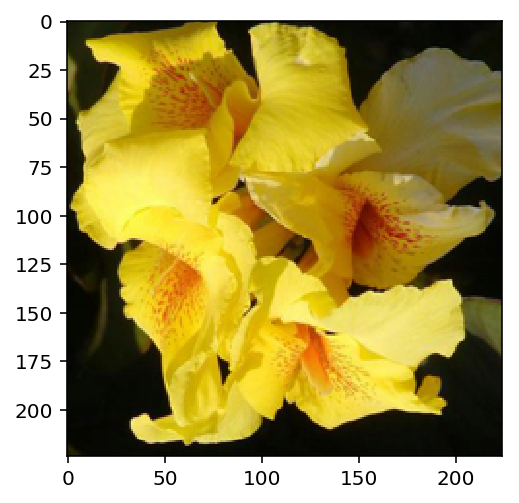

In [18]:
model.cuda()
def imshow(image, ax=None, title=None):
    if ax is None:
        fig, ax = plt.subplots()
    
    # PyTorch tensors assume the color channel is the first dimension
    # but matplotlib assumes is the third dimension
    
    # Undo preprocessing
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    image = std * image + mean
    
    # Image needs to be clipped between 0 and 1 or it looks like noise when displayed
    image = np.clip(image, 0, 1)
    
    ax.imshow(image)
    
    return ax
imshow(img)

## Class Prediction

In [19]:
model.class_to_idx = trainset.class_to_idx
cat = model.class_to_idx
def predict(image_path, model, topk=5):
    image = process_image(image_path)
    image = torch.from_numpy(image)
    image = image.float()
    image = np.transpose(image, (2, 1, 0))
    with torch.no_grad():
        model.eval()
        image.unsqueeze_(0)
        image = image.to('cuda')
        output = model.forward(image)
    ps = torch.exp(output)
    check = torch.topk(ps, topk)
    probs = check[0].cpu()
    classes = check[1].cpu()
    c = classes.numpy()
    c = list(c)
    l1 = []
    for i in range(5):
        z = c[0][i]
        for a in cat.keys():
            if cat[a] == z:
                r = a
                l1.append(r)
    return probs, l1
probes, classes = predict(image_path, model, topk = 5)
p = probes.numpy()
probes = np.reshape(p, (np.product(p.shape),))

(529, 500)
(270, 256)
classes =  ['90', '83', '43', '72', '68']
probes =  [0.809759   0.15253757 0.01166365 0.0107946  0.0074218 ]


## Prediction Output

[('canna lily', 0.809759), ('hibiscus', 0.15253757), ('sword lily', 0.011663648), ('azalea', 0.010794599), ('bearded iris', 0.0074217995)]


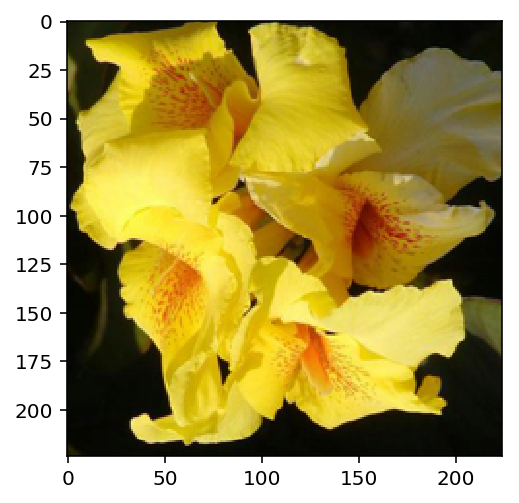

In [20]:
#Displaying an image along with the top 5 classes
imshow(img)   
names = []
for i in classes:
    j = cat_to_name[i]
    names.append(j)

result = list(zip(names,probes))
print(result)    

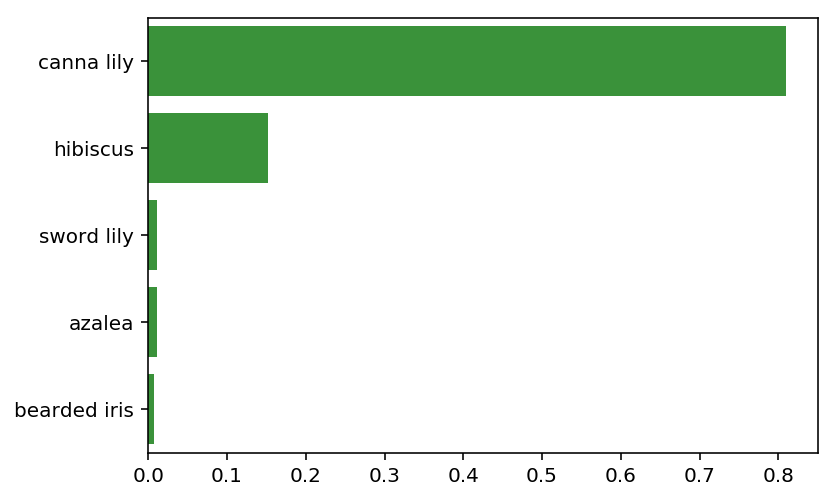

In [21]:
base_color = sb.color_palette()[2]
sb.barplot(y = names, x = probes, color = base_color)